Computação Científica I
=======================

Objetivos do curso
------------------

### Em Programação
- Complexidade computacional
- Algoritmos como representação de procedimentos de cálculo e lógica
- Estruturas de código
  - blocos
  - funções
  - iteradores
- Ferramentas de abstração
  - funções
  - classes

### Em Matemática
1. Estudo de funções
  1. Raízes
  1. Interpolação
  1. Splines
  1. Tangentes aproximadas

2. Álgebra Linear computacional
  1. Solução de sistemas lineares
  1. Fatoração
  1. Valores Próprios

3. Equações diferenciais ordinárias
  2. Integração numérica
  2. Ordem
  2. Convergência
  2. Estabilidade

Um exemplo
----------

Seja $A$ a matriz de Hilbert 15 x 15:
$$A_{i,j} = \frac{1}{i+j-1}$$

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
A = array( [[1./(i+j+1) for i in range(15)] for j in range(15)] )

Seja agora $v$ um vetor de $\mathbf{R}^{15}$:

In [4]:
v = rand(15); print(v)

[ 0.35215093  0.49844679  0.59079905  0.53076398  0.76727353  0.64545757
  0.93565927  0.66587268  0.93557003  0.21453856  0.65329243  0.80560571
  0.93853758  0.82098178  0.85254343]


Note que todas as entradas de $v$ são positivas entre $0$ e $1$, pois é como a função _rand()_ funciona.

Seja $b = A \cdot v$.

In [5]:
b = dot(A,v); print(b)

[ 1.84853209  1.41163306  1.18421463  1.03289663  0.9214809   0.83464612
  0.7644182   0.70610797  0.65672454  0.61424585  0.57724347  0.54467306
  0.51574961  0.48986945  0.46655934]


Agora, vamos pedir para o computador calcular $v$ a partir de $b$ e $A$.

Vamos fazer isso de duas formas: primeiro, usando a inversa de $A$:

In [6]:
Ainv = inv(A)
xinv = dot(Ainv,b)

Segundo, usando o método _solve()_, inspirado do método de eliminação de Gauss.
Assim, não invertemos a matriz $A$ completamente:

In [7]:
xsolve = solve(A,b)

Vejamos a diferença...

In [8]:
print(xinv-v)
print(xsolve-v)

[ -9.70301941e+00   4.72454154e+01  -9.85516297e+01   4.01551145e+02
  -1.35795184e+03   2.69469634e+03  -3.58366808e+03   3.20289663e+03
  -1.58806057e+03   1.40535461e+02   2.37096708e+02  -9.64306057e+01
   1.91239624e+01  -4.14520053e+00   3.60347192e-01]
[  1.26718709e-07  -1.93761510e-05   7.39270746e-04  -1.22962871e-02
   1.10755363e-01  -6.01234353e-01   2.07306035e+00  -4.59317971e+00
   6.24546333e+00  -4.07470993e+00  -1.47546510e+00   5.49633580e+00
  -4.87062966e+00   2.05285211e+00  -3.51671936e-01]


Vimos mesmo? Com um gráfico é melhor, não?

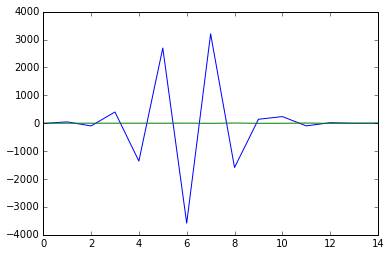

In [9]:
plot(xinv-v), plot(xsolve-v);

Primeira observação: um método dá muito menos erro do que o outro.
Qual?
Precisamos de uma legenda...

Pior ainda, temos erros negativos e positivos, mas interessa apenas a diferença, ou seja, o valor absoluto.
Façamos estas modificações.

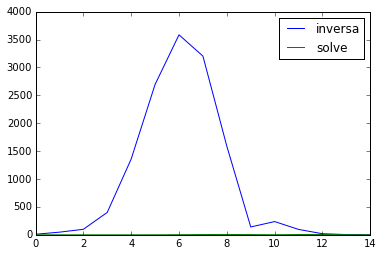

In [10]:
plot(abs(xinv-v)), plot(abs(xsolve-v))
legend(['inversa', 'solve']);

Ainda assim, é difícil de comparar os resultados nesta forma.

Vejamos duas outras mudanças importantes: erros relativos, e escala logaritmica no eixo $y$.

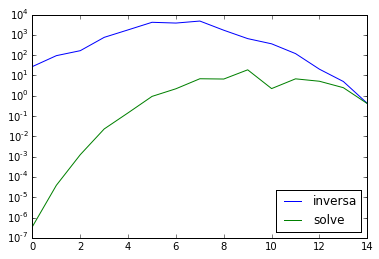

In [11]:
semilogy(abs(xinv - v) / abs(v)), semilogy(abs(xsolve - v) / abs(v))
legend(['inversa', 'solve'], loc=0);

Poderíamos, também, ver qual o erro da aproximação, ou seja, a diferença entre $b$ e $A \cdot x$:

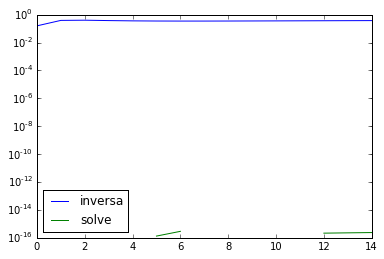

In [12]:
semilogy(abs(dot(A,xinv) - b)/abs(b), label='inversa')
semilogy(abs(dot(A,xsolve) - b)/abs(b), label='solve')
legend(loc=0);

Ocorrem dois fenômenos interessantes neste gráfico:

- a diferença de magnitude dos erros: $O(1)$ para o cálculo usando $A^{-1}$, enquanto este é $O(\epsilon)$ no caso de *solve*
- o gráfico de solve é _descontínuo_ e _truncado_

Para entender melhor este comportamento, vejamos o gráfico sem estar em escala logarítmica.

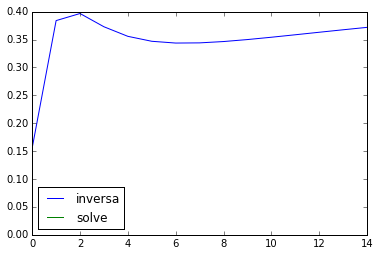

In [13]:
plot(abs(dot(A,xinv) - b)/abs(b), label='inversa')
plot(abs(dot(A,xsolve) - b)/abs(b), label='solve')
legend(loc=0);

Indo ao contrário dos gráficos de erro em $x$, vejamos agora os erros absolutos, e não mais relativos, em $A\cdot x$:

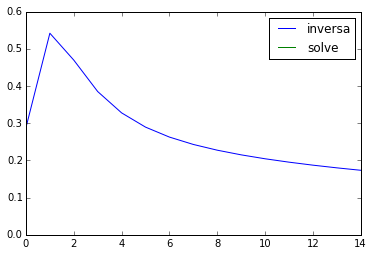

In [14]:
plot(abs(dot(A,xinv) - b), label='inversa')
plot(abs(dot(A,xsolve) - b), label='solve')
legend(loc=0);

Enfim, guiados pelos gráficos, completamos o percurso inverso observando os valores numéricos destes erros.

In [15]:
print(abs(dot(A,xinv) - b))
print(abs(dot(A,xsolve) - b))

[ 0.28814004  0.54187559  0.46962748  0.3850853   0.3277534   0.28946214
  0.26267508  0.24286774  0.22744997  0.21491803  0.20437205  0.19525427
  0.18720624  0.17998922  0.17343851]
[  2.22044605e-16   0.00000000e+00   2.22044605e-16   0.00000000e+00
   0.00000000e+00   1.11022302e-16   2.22044605e-16   0.00000000e+00
   2.22044605e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.11022302e-16   1.11022302e-16   1.11022302e-16]


Observe como os "zeros" e os "não-zeros" saltam mais aos nossos olhos agora que sabemos o que devemos procurar nos números!

###Visualizando matrizes

É interessante observar os valores das matrizes $A$ e $A^{-1}$,
além de notar as diferenças entre $AA^{-1}$, $A^{-1}A$ e a matriz identidade.

Obviamente, não vamos nos limitar a contemplar tabelas com 225 números!

In [16]:
# Esta função permite visualizar duas matrizes lado a lado, o que é muito útil para comparações.
def twomatshow(M1, M2):
    fig, axes = plt.subplots(ncols=2, figsize=(10,4))
    fig.colorbar(axes[0].matshow(M1), ax=axes[0])
    fig.colorbar(axes[1].matshow(M2), ax=axes[1])

Para começar nossa análise, comparemos as matrizes $A$ e $A^{-1}$.
Como sabemos perfeitamente qual é a estrutura de $A$, isso vai nos ajudar a compreender como funciona este modo de visualização de matrizes.

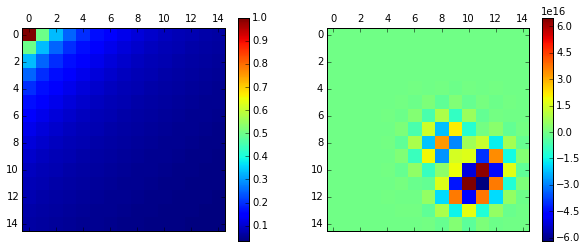

In [17]:
twomatshow(A, Ainv)

Vejamos como são as matrizes $A A^{-1}$ e $A^{-1} A$. Lembre-se que ambas deveriam ser iguais à matriz identidade!

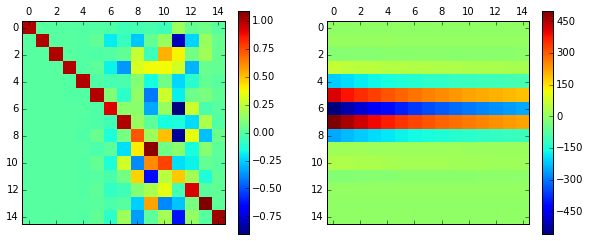

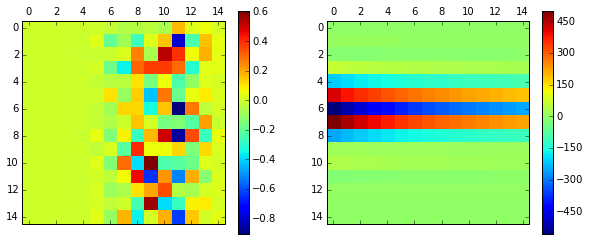

In [18]:
twomatshow(dot(A,Ainv), dot(Ainv,A))
twomatshow(dot(A,Ainv) - eye(15), dot(Ainv,A) - eye(15))

Inspirados pelos sucessos da escala logarítmica na análise de erros anterior, vejamos como ficam estas matrizes em escala log:

In [19]:
# Esta função permite calcular logaritmos (em base 10) e truncar números próximos de zero.
# Assim, é possível ajustar esta tolerância para obter uma melhor escala nos gráficos
def tollog(M, tol=1e-15):
    return [[log10(abs(x) + tol) for x in col] for col in M]

-c:2: RuntimeWarning: divide by zero encountered in log10


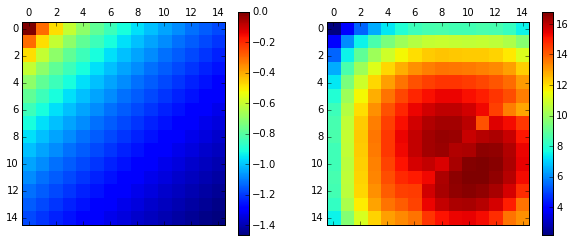

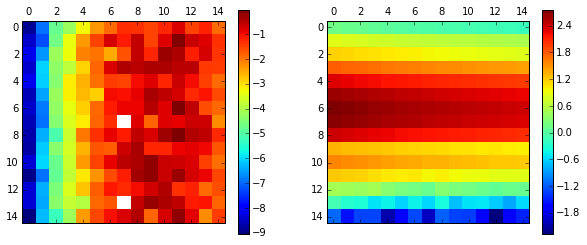

In [20]:
twomatshow(tollog(A), tollog(Ainv))
twomatshow(log10(abs(dot(A,Ainv)-eye(15))), log10(abs(dot(Ainv,A)-eye(15))))

In [21]:
from mpl_toolkits.mplot3d import Axes3D

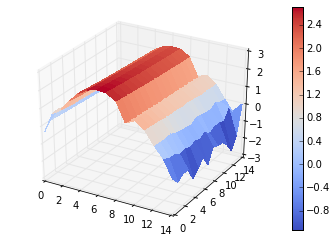

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = [[i for i in range(15)] for j in range(15)]
Y = [[j for i in range(15)] for j in range(15)]

surf = ax.plot_surface(Y,X,tollog(dot(Ainv,A)), rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=cm.coolwarm)
fig.colorbar(surf, ax=ax);

Plano de aulas
--------------

1. Ambiente de programação
    1. Interpretador interativo, Interpretador de arquivos, iPython
    1. Revisão da sintaxe de python
    1. Funções
    1. Números "reais"
    1. NumPy, SciPy: Matrizes e o mais
    1. MatPlotLib: gráficos

2. Usando o computador para calcular    
    1. Indução e algoritmos recursivos: fatoriais, binomiais, Fibonacci, Hanói
    1. Aproximações sucessivas: bisseção, Newton
    1. Complexidade 1: trocando esforço do computador por esforço de programação, e vice-versa
    1. Visualização 1: observar a convergência dos métodos acima
    1. Benchmarking 1: quão grandes devem ser os argumentos de fact / binom / fib para que o computador leve mais de 1 segundo para calcular?
    1. Desafio 1: ache uma função e um ponto inicial que fazem o método de Newton divergir / entrar em loop *longe* da raiz.
    1. Extra:
        1. Critérios de parada
        1. Aceleração de convergência
        1. Newton-Horner (deflação de polinômios)
        1. Schleicher et al. (múltiplos pontos iniciais)

3. Usando o computador para desenhar
    1. Traçando secantes e tangentes (derivadas)
    1. Animações e aproximações: algoritmo de secantes para achar zeros _vs_ Newton
    1. Funções de $\mathbf{R}^2$ em $\mathbf{R}$: planos secantes e tangentes
    1. Complexidade 2: quão mais lentos ficam os algoritmos se a dimensão vai para infinito?
    1. Visualização 2: o que acontece com os algoritmos acima se a função não é diferenciável?
    1. Iteração de funções reais, métodos de ponto fixo
    1. Iteração de funções complexas: Julia e Mandelbrot
    1. Benckmarking 2: qual a precisão necessária para calcular um conjunto de Julia com uma dada resolução ("dpi")?
    1. Desafio 2: ache conjuntos de Julia (de comprimento infinito) auto-semelhantes, e faça um zoom nos pontos de similitude
    1. Extra: Sistemas de equações não-lineares
        1. Método de Newton
        1. Regra de Broyden para aproximação do Jacobiano ("secante")

4. Usando o computador para chutar
    1. Aproximação via série de Taylor
    1. Interpolação de Lagrange
    1. Erros: fenômeno de Runge, estabilidade
    1. Consertos: pontos de Chebyshev, algoritmos (fórmulas) numericamente estáveis
    1. Interpolação trigonométrica: transformada de Fourier
    1. Interpolação com "pouca" informação: poligonal, spline
    1. Extrapolação com "muita" informação: mínimos quadrados
    1. Complexidade 3: compare o custo computacional de cada um dos métodos, tanto no caso em que $f$ seja "rápida" de calcular, como "lenta"
    1. Visualização 3: onde estão os pontos $\xi$ correspondentes a $f^{(n)}(\xi)$ que controlam o erro em cada caso?
    1. Benckmarking 3: "Será que os pontos de Chebyshev são bons num computador?": calcular em pontos "próximos mas não iguais" induz mais erro do que pontos eqüiespaçados?
    1. Desafio 3: faça um modelo para prever o tempo no Fundão, sem olhar para o céu.
    1. Extra: matemática simbólica = álgebra
        1. As 4 operações
        1. Derivação simbólica
        1. Algumas idéias de integração simbólica
        1. Interpolação de Lagrange = Álgebra Linear

5. Quadraturas: Integrais numéricas
    1. Derivadas: para treinar a fórmula de Taylor
    1. Cauchy: ordem zero
    1. Pontos médios: ordem 1
    1. Trapézios: ordem 1
    1. Simpson: ordem 3
    1. Fórmulas adaptativas: precisão e tempo de execução
    1. Monte-Carlo
    1. Complexidade 4: compare a quantidade de vezes que calculamos $f(x)$ para obter uma mesma precisão em cada um dos métodos
    1. Visualização 4: desenhe as curvas das funções e as áreas integradas em cada um dos métodos, para ver os excessos cancelarem as faltas
    1. Benchmarking 4: em que dimensão as fórmulas de Monte-Carlo se tornam mais eficientes do que a fórmula de Cauchy / trapézios / Simpson ? 
    1. Desafio 4: calcule $\int_0^\infty \exp(-x^2) dx$ e $\int_0^\infty \exp(-x^2) \sin(x) \, dx$
    1. Extra
        1. Fórmula de Gauss-Legendre: generalizando
        1. Fórmula de Gauss-Legendre: pontos especiais
        1. Fórmulas de Newton-Cotes
        1. Um gostinho de equações diferenciais

6. Álgebra Linear: o pivô da matemática computacional
    1. Eliminação de Gauss: fatoração LU
    1. Pivôs e permutações: fatoração PLU para matrizes quaisquer
    1. Estabilidade: pivôs "heurísticos"
    1. Precisão e estabilidade: erros relativos, autovalores, condicionamento
    1. Interlúdio: matrizes esparsas
        1. *Fill-in* e pivôs simultâneos em linhas e colunas
        1. Matrizes tridiagonais
    1. Sistemas sobredeterminados: Cholesky, QR, SVD, pseudoinversa
    1. Sistemas subdeterminados ou singulares: mínimos quadrados
    1. Precisão: métodos iterativos
    1. Métodos iterativos para matrizes simétricas positivas definidas
        1. Gauss-Seidel
        1. Richardson, simples e adaptativo
        1. Gradiente Conjugado
    1. Critérios de parada: residuais vs incrementos
    1. Complexidade 5: métodos mais simples funcionam bem, mas às custas de o usuário fornecer maiores garantias sobre as matrizes
    1. Visualização 5: compare os erros de $Id - A \cdot A^{-1}$ e $Id - A^{-1} \cdot A$
    1. Benchmarking 5: compare algoritmos de mesma complexidade com relação aos erros de suas soluções
    1. Desafio 5: inverta a matriz de Hilbert!

0. Sugestões do Cláudio
    1. Otimização
        1. Máximos e mínimos
        1. Restrições
        1. PL
    1. Monte Carlo simulation
        1. Integrais
        1. MCMC

Uma última surpresa
===================

Um amigo calculou no computador dele a inversa de $A$, com outro sistema operacional, outra versão do Python e do NumPy.
Esta foi a matriz que ele me passou:

In [21]:
AinvJ = [[  1.51757773690819704e+02,  -1.14504630514428718e+04,
    2.81453835174737498e+05,  -3.31918455782791972e+06,
    2.20715151025521755e+07,  -8.96727719984579086e+07,
    2.31091707339811325e+08,  -3.81721378367977142e+08,
    4.07917990524166107e+08,  -3.24976701488826752e+08,
    3.23166092036190033e+08,  -4.10219869163082123e+08,
    3.68178012670894623e+08,  -1.78051345292280197e+08,
    3.52657727074809074e+07,],
 [ -1.14515036540715791e+04,   1.15729260998658254e+06,
   -3.21930175342225991e+07,   4.08231086020125329e+08,
   -2.85976860483275938e+09,   1.21499438139269695e+10,
   -3.27930484527676353e+10,   5.73886040899141769e+10,
   -6.64945272918925705e+10,   5.73410581783238449e+10,
   -5.30657111700516281e+10,   5.86636077465073166e+10,
   -4.96810431600461349e+10,   2.36495342552320824e+10,
   -4.67583509346510220e+09,],
 [  2.81525348500534543e+05,  -3.21981121498478204e+07,
    9.62576320476041317e+08,  -1.28400005553230057e+10,
    9.37535624884216461e+10,  -4.14291082159628784e+11,
    1.16758958426699146e+12,  -2.15701620275205835e+12,
    2.68201717003465527e+12,  -2.45731828409729102e+12,
    2.14170945594381274e+12,  -2.06214159126878271e+12,
    1.62502545313366602e+12,  -7.56401868815850708e+11,
    1.48983209506309540e+11,],
 [ -3.32052927180680167e+06,   4.08344745719802737e+08,
   -1.28411816066732006e+10,   1.78372355613357941e+11,
   -1.35111002204542212e+12,   6.19801741389333496e+12,
   -1.82248874302384219e+13,   3.54656972370180547e+13,
   -4.69332945599344766e+13,   4.50372160145576328e+13,
   -3.71077377714182812e+13,   3.08631077516504727e+13,
   -2.21270534707211250e+13,   9.96448006968724023e+12,
   -1.95037239964900903e+12,],
 [  2.20786646558217704e+07,  -2.86007042436293077e+09,
    9.37375286971405334e+10,  -1.35067385068473242e+12,
    1.06033229931942109e+13,  -5.05237121740785391e+13,
    1.55108986350836844e+14,  -3.17473133072111562e+14,
    4.43805187134421375e+14,  -4.40362233553099250e+14,
    3.41779367140444562e+14,  -2.39982197010943125e+14,
    1.49764912339967188e+14,  -6.38322022054320234e+13,
    1.23714837490361426e+13,],
 [ -8.96229534456447363e+07,   1.21380157993600140e+10,
   -4.13688751925792358e+11,   6.18714083543191016e+12,
   -5.04475556650432578e+13,   2.50330091381107875e+14,
   -8.03700225346658125e+14,   1.72734114916235975e+15,
   -2.53064274499621000e+15,   2.56125198346669450e+15,
   -1.84697819779853350e+15,   1.03308508345410450e+15,
   -4.96657043486057188e+14,   1.86040830717521125e+14,
   -3.54089025833375469e+13,],
 [  2.30215561865560353e+08,  -3.26424408802430038e+10,
    1.16131640418859082e+12,  -1.81177976837234219e+13,
    1.54223972324578344e+14,  -8.00344122985283750e+14,
    2.69181739243052250e+15,  -6.05684987320585300e+15,
    9.20595814708139200e+15,  -9.33383194583299600e+15,
    6.04107118353837400e+15,  -2.23555451412660900e+15,
    3.27150411669890375e+14,   3.15263810763527148e+13,
   -8.17806745190263281e+12,],
 [ -3.76338528479269445e+08,   5.65158472345365219e+10,
   -2.12235347105018628e+12,   3.48832124202479570e+13,
   -3.12424311312523250e+14,   1.70331242399012150e+15,
   -6.00016292330238700e+15,   1.40378509532757160e+16,
   -2.17839742449580440e+16,   2.14484491043155080e+16,
   -1.12944720773226740e+16,   1.65311944752561312e+14,
    3.71253395720500900e+15,  -2.10970684924860500e+15,
    4.00464967060692812e+14,],
 [  3.88924448938366354e+08,  -6.34711135949680023e+10,
    2.56393080450348633e+12,  -4.49596316419180000e+13,
    4.26368449073078188e+14,  -2.44127798514422050e+15,
    8.93631583195945100e+15,  -2.13630250255543440e+16,
    3.27559147145165840e+16,  -2.90208044836483360e+16,
    7.50511369614841200e+15,   1.31312497479012000e+16,
   -1.61414513707139940e+16,   7.66032924169502100e+15,
   -1.40627414273680150e+15,],
 [ -2.82069333668274939e+08,   5.05555012503930130e+10,
   -2.19402428546612866e+12,   4.06446912667622500e+13,
   -4.01203858903442438e+14,   2.35413190959291550e+15,
   -8.65416919067723500e+15,   2.00816849385664680e+16,
   -2.75669540640878400e+16,   1.50708376961806160e+16,
    1.65500311776309580e+16,  -3.96666698198635840e+16,
    3.43101949383426600e+16,  -1.47080344595083760e+16,
    2.59165012233738750e+15,],
 [  2.58952473140130520e+08,  -4.29311861016064835e+10,
    1.74943312138722852e+12,  -3.05660737780561758e+13,
    2.83186180807199812e+14,  -1.53235289680936150e+15,
    4.97024563049054400e+15,  -8.94451645433026400e+15,
    4.28031009884556550e+15,   1.89039959707779720e+16,
   -5.09035794856662560e+16,   6.31262887503032240e+16,
   -4.45456975592078160e+16,   1.72498115413405240e+16,
   -2.85883275985477200e+15,],
 [ -3.46716877776905537e+08,   4.86420468395711899e+10,
   -1.67447658615829370e+12,   2.43969492108269023e+13,
   -1.81912706275060219e+14,   7.18906026120977000e+14,
   -1.14763224498057975e+15,  -2.31350235119247500e+15,
    1.68409463988149720e+16,  -4.31492624846412640e+16,
    6.48443770947830640e+16,  -6.16971852789926480e+16,
    3.66914613756263280e+16,  -1.24925933762554840e+16,
    1.86362675551120175e+15,],
 [  3.28224821418262243e+08,  -4.33709038428398285e+10,
    1.38086650394500464e+12,  -1.80525386270404102e+13,
    1.13117570535927406e+14,  -2.97633156724429000e+14,
   -3.67630287277440375e+14,   5.32228726815530800e+15,
   -1.86368655564307760e+16,   3.68515059874259840e+16,
   -4.61417884849948800e+16,   3.71979143944341280e+16,
   -1.86486799434141640e+16,   5.24951739456187100e+15,
   -6.25030229328801000e+14,],
 [ -1.63551655502524972e+08,   2.13567508672878036e+10,
   -6.67626516778338135e+11,   8.48210137268818750e+12,
   -5.04870886962564219e+13,   1.13441831368766062e+14,
    2.85814919748801938e+14,  -2.70274652235979350e+15,
    8.59178509464102900e+15,  -1.56834240220876600e+16,
    1.79048886883451580e+16,  -1.27497670004526820e+16,
    5.29531892401498900e+15,  -1.06342104565599475e+15,
    5.07603797698385625e+13,],
 [  3.29536951607253887e+07,  -4.30974144499378872e+09,
    1.34795829241564102e+11,  -1.71331772884636328e+12,
    1.02362263651618262e+13,  -2.37862249084883086e+13,
   -4.89179634803708438e+13,   4.95583314622761750e+14,
   -1.55596578260997825e+15,   2.74900783339114650e+15,
   -2.96542445327104950e+15,   1.90644960389429125e+15,
   -6.33386989669823875e+14,   5.11308092530455625e+13,
    1.66564663133801875e+13,],]

Para ter tantas casas decimais, foi preciso pedi-las explicitamente para o NumPy:

    np.set_printoptions(precision=17)
    print(Ainv)

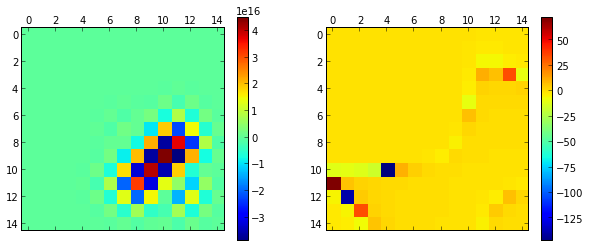

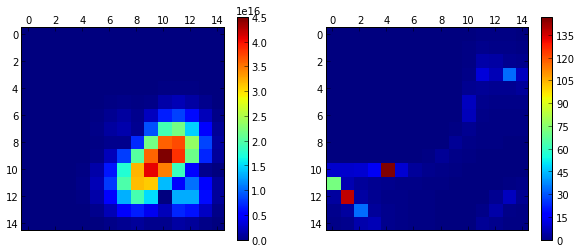

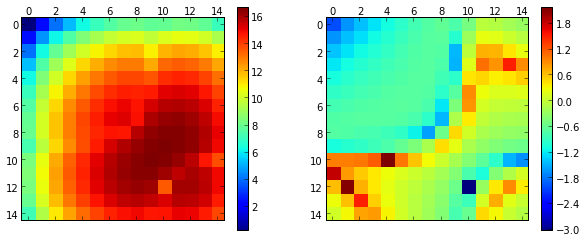

In [22]:
twomatshow(Ainv-AinvJ, (Ainv-AinvJ)/Ainv)
twomatshow(abs(Ainv-AinvJ), abs((Ainv-AinvJ)/Ainv))
twomatshow(log10(abs(Ainv-AinvJ)), tollog((Ainv-AinvJ)/Ainv))

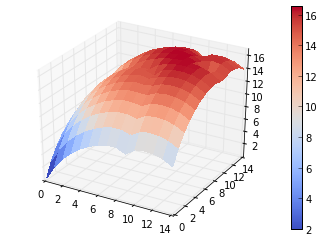

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = [[i for i in range(15)] for j in range(15)]
Y = [[j for i in range(15)] for j in range(15)]

surf = ax.plot_surface(Y,X,tollog(Ainv-AinvJ, 1e-8), rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=cm.coolwarm)
fig.colorbar(surf, ax=ax);